### Reading CSV

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import (silhouette_score, davies_bouldin_score, 
                             adjusted_rand_score, normalized_mutual_info_score, 
                             fowlkes_mallows_score)
import numpy as np
from sklearn.preprocessing import StandardScaler


In [103]:
headers = [  "Sepal Length","Sepal Width","Petal Length","Petal Width", "class" ]
df = pd.read_csv('assets/iris.data', header=None, names=headers)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [104]:
print("Shape of the dataframe is: ", df.shape)
print("Shape of the dataframe is: ", df.shape)
df.describe()

Shape of the dataframe is:  (150, 5)
Shape of the dataframe is:  (150, 5)


,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [105]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Exploratory Data Analysis

#### Data Distribution

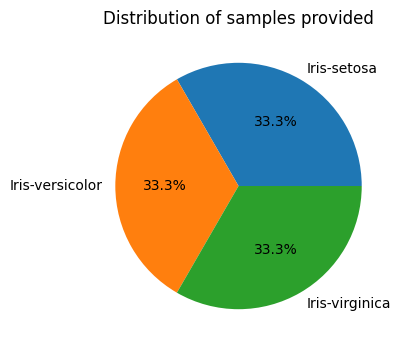

In [106]:
plt.figure(figsize=(4,4))
plt.title("Distribution of samples provided")
plt.pie(y.value_counts(), labels=y.value_counts().index,autopct='%1.1f%%');

`Conclusion:` The data is perfectly balanced across all classes. 

#### Feature Distribution Analysis

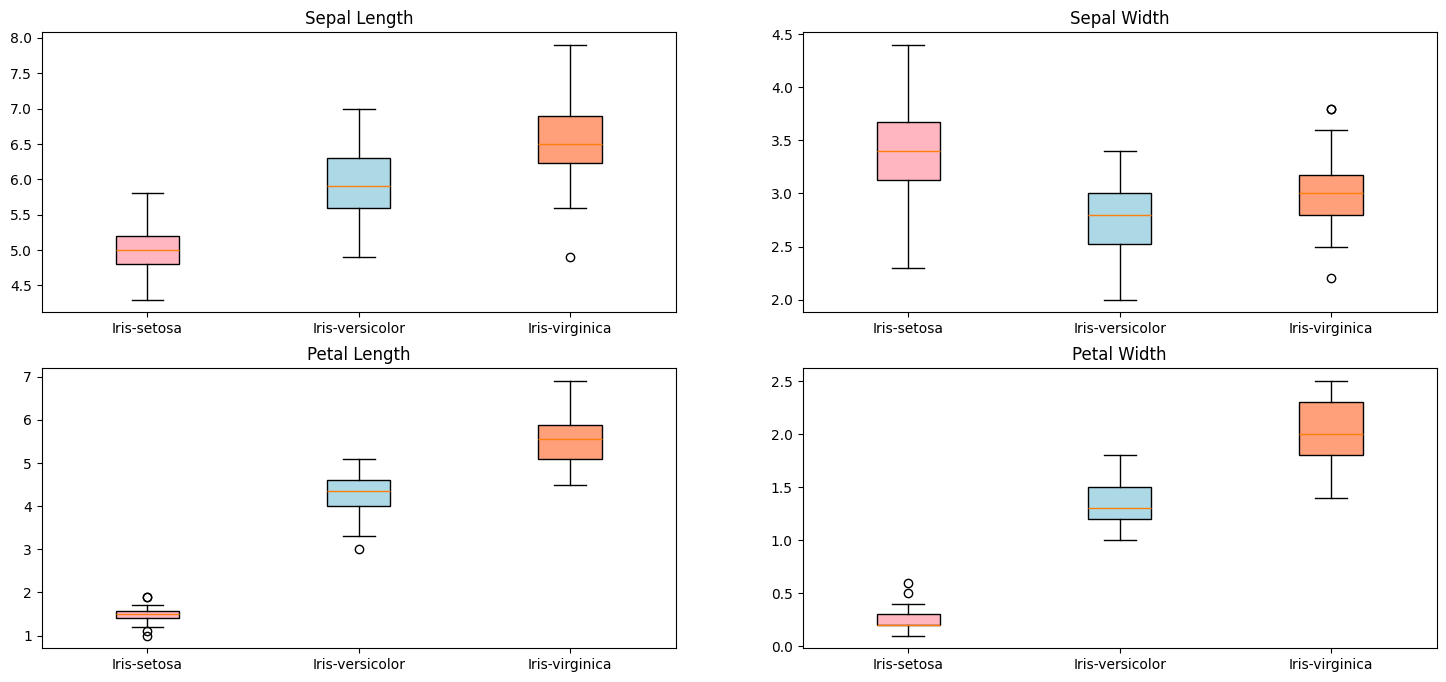

In [ ]:

plt.figure(figsize=(18,8))
def box_feat(df, feature, i):
    ax = plt.subplot(2,2,i)
    ax.set_title(feature)
    labels = y.unique()
    box = ax.boxplot(
        [ df[df['class'] == labels[0]][feature],
        df[df['class'] == labels[1]][feature],
        df[df['class'] == labels[2]][feature] ], 
        patch_artist=True, 
        tick_labels=labels
        );
    k = 0
    colors = ['lightpink', 'lightblue', 'lightsalmon']
    for patch in box['boxes']:
        patch.set(facecolor=colors[k])
        k+=1

box_feat(df,'Sepal Length',1)
box_feat(df,'Sepal Width',2)
box_feat(df,'Petal Length',3)
box_feat(df,'Petal Width',4)



`Conclusion:` Only a few outliers are present, hence the data is relatively clean.

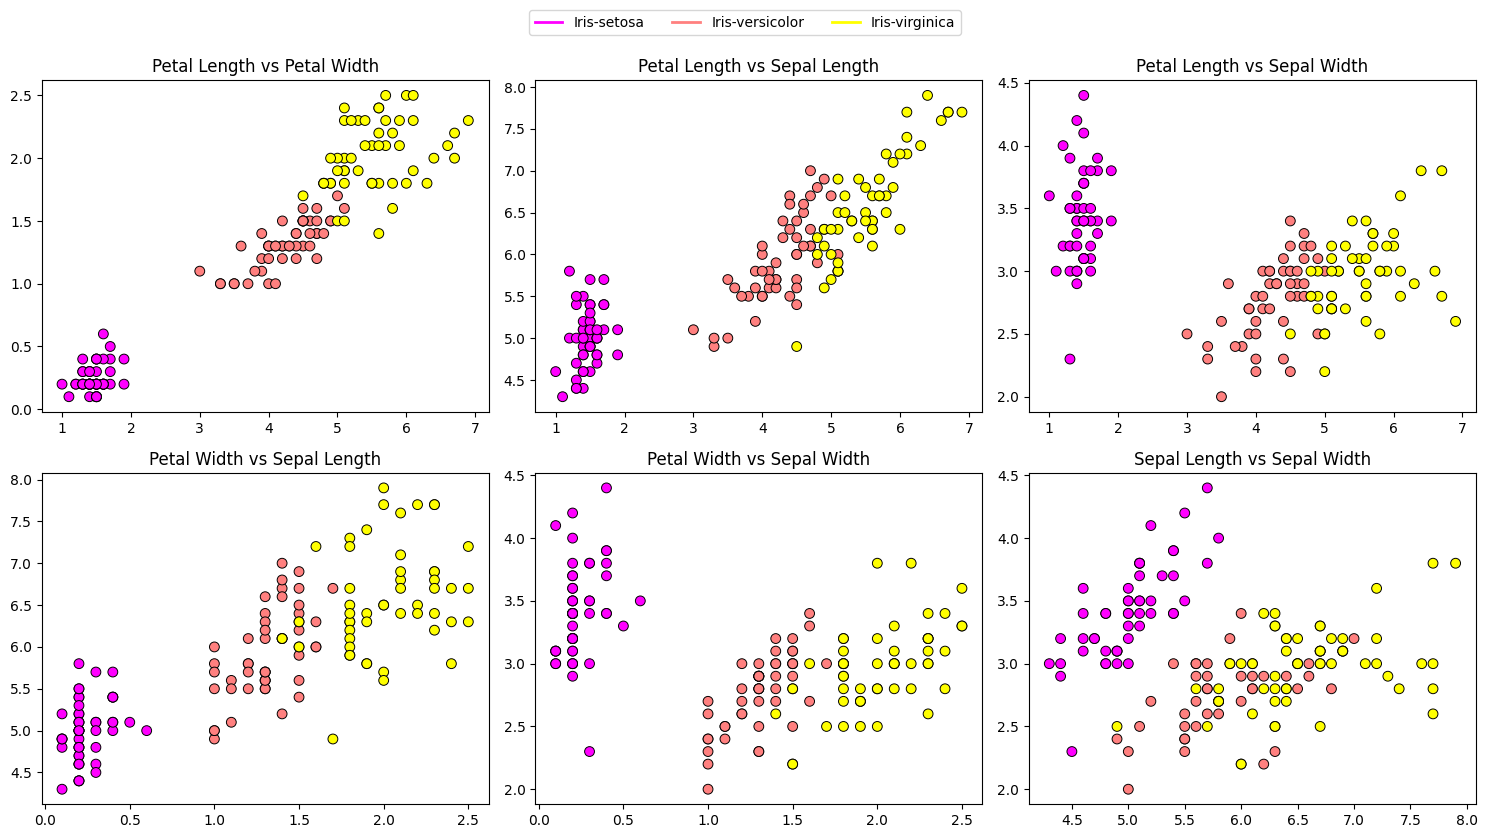

In [108]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

fig, ax = plt.subplots(2,3)
fig.set_figwidth(15)
fig.set_figheight(8)

def scatter_call(i, j, f1, f2, title):
    ax[i][j].set_title(title)
    ax[i][j].scatter(   df[f1], 
                        df[f2], 
                        marker='o',
                        edgecolors='black',
                        linewidth=.7,  
                        c=y_encoded, 
                        cmap='spring', 
                        s = 50);

scatter_call(0, 0, 'Petal Length', 'Petal Width', "Petal Length vs Petal Width");
scatter_call(0, 1, 'Petal Length', 'Sepal Length', "Petal Length vs Sepal Length");
scatter_call(0, 2, 'Petal Length', 'Sepal Width', "Petal Length vs Sepal Width");
scatter_call(1, 0, 'Petal Width', 'Sepal Length', "Petal Width vs Sepal Length");
scatter_call(1, 1, 'Petal Width', 'Sepal Width', "Petal Width vs Sepal Width");
scatter_call(1, 2, 'Sepal Length', 'Sepal Width', "Sepal Length vs Sepal Width");


cmap = plt.get_cmap('spring')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]  # Extract 4 evenly spaced colors

# Create custom legend handles with Line2D
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
handles = [Line2D([0], [0], color=colors[i], lw=2, label=labels[i]) for i in range(3)]

# Add the custom legend to the figure
fig.legend(handles=handles, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))


plt.tight_layout();

`Conclusion:` The Iris setosa species can be easily distinguished using the provided features, whereas the other two species exhibit more similar characteristics, making them harder to differentiate. Nonetheless, the dataset remains well-suited for clustering tasks.

### Standardization

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled    

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


### Main Problem Task - K Means Clustering

The problem statement can be divided into 3 sub-parts - 
- Finding optimal number of clusters
- Finding the most suitable distance measure
- Evaluating clusters formed based on provided labels

#### Optimal number of Clusters

The `KMeans()` function provided by `scikit-learn` has the following parameters we would need to specify:

1. `n_clusters` - Number of **clusters** / **centroids** to generate. This defines how many clusters KMeans will form.
2. `random_state` - Determines the random number generation for **centroid initialization**. A fixed value (e.g., 2) ensures reproducibility.
3. `init` - **Method for initializing centroids**. `"k-means++"` is a common choice as it spreads out the initial cluster centers.
4. `tol` - **Tolerance** for convergence. The algorithm stops if the changes in centroids are smaller than this threshold (e.g., 1e-4).
5. `n_init` - **Number of initializations**. The algorithm runs with different centroid seeds `n_init` times and returns the best result. Higher values (e.g., 200) can lead to better outcomes.
6. `max_iter` - **Maximum number of iterations** for a single initialization. The algorithm stops after this many iterations if it hasn’t converged.
<!-- 7. `init` - Strategy for selecting initial cluster centroids -->

The parameters that we will be looking at are - 
1. `inertia_` - Sum of squared distances of samples to their closest cluster center


##### Method 1 - Elbow Method ( Not Automated )

We can visually verify that around 3 clusters the SSE starts to plateu


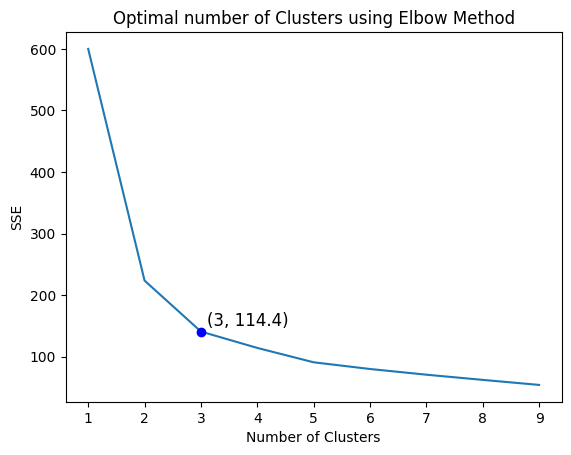

In [110]:
sse = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=2, init='k-means++', tol=1e-4, n_init=200, max_iter=500)
    kmeans.fit(X_scaled) 
    sse.append(kmeans.inertia_)

fig = plt.plot([i for i in range(1,10)], sse)
plt.title("Optimal number of Clusters using Elbow Method");
plt.xlabel("Number of Clusters");
plt.ylabel("SSE");
plt.plot(3, sse[2], 'o', color='b');
plt.text(3+.1, sse[2]+10, f'(3, {round(sse[3],1)})', fontsize=12, ha='left');

print("We can visually verify that around 3 clusters the SSE starts to plateu")


##### Method 2 - Silhoutte Analysis ( Automated )

Optimal number of clusters: 2 with a score of 0.580184463257396


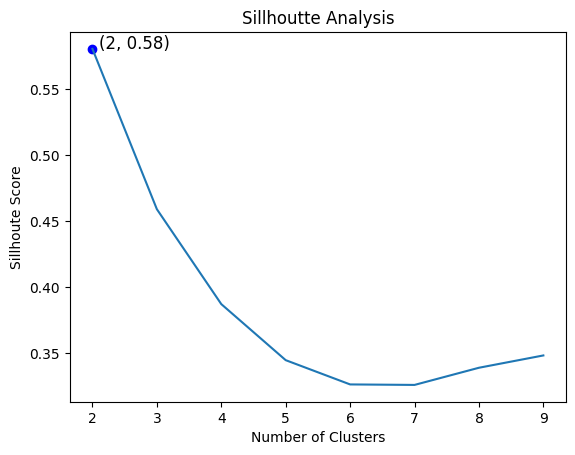

In [123]:
from sklearn.metrics import silhouette_score

best_k = 0
best_score = -1
score_arr = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=2, init='k-means++', tol=1e-4, n_init=200, max_iter=500).fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    if score > best_score:
        best_k = k
        best_score = score
    score_arr += [score]


print(f"Optimal number of clusters: {best_k} with a score of {best_score}")

plt.title("Sillhoutte Analysis")
plt.xlabel("Number of Clusters");
plt.ylabel("Sillhoute Score");
plt.plot(best_k, score_arr[best_k-2], 'o', color='b');
plt.text(best_k+.1, score_arr[best_k-2], f'({best_k}, {round(score_arr[best_k-2],2)})', fontsize=12, ha='left');

plt.plot([i for i in range(2,10)], score_arr);

##### Method 3 - Calinski-Harabasz Index ( Automated )

Optimal number of clusters: 2 with a score of 248.90342786485118


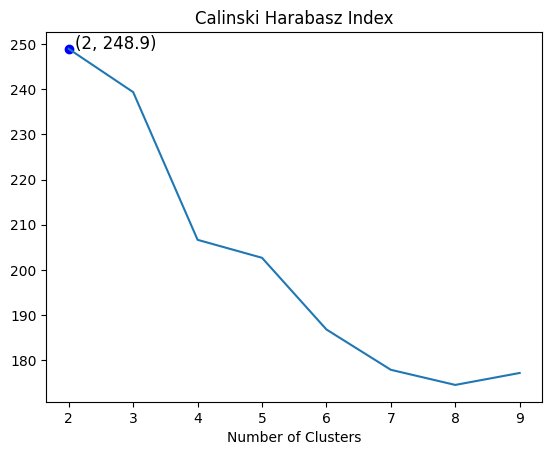

In [121]:
from sklearn.metrics import calinski_harabasz_score

best_k = 0
best_score = -1
score_arr = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=2, init='k-means++', tol=1e-4, n_init=200, max_iter=500).fit(X_scaled)
    score = calinski_harabasz_score(X_scaled, kmeans.labels_)
    if score > best_score:
        best_k = k
        best_score = score
    score_arr += [score]


print(f"Optimal number of clusters: {best_k} with a score of {best_score}")

plt.title("Calinski Harabasz Index")
plt.xlabel("Number of Clusters");
plt.plot(best_k, score_arr[best_k-2], 'o', color='b');
plt.text(best_k+.1, score_arr[best_k-2], f'({best_k}, {round(score_arr[best_k-2],2)})', fontsize=12, ha='left');

plt.plot([i for i in range(2,10)], score_arr);

##### Method 4 - V-Measure ( Automated )

Optimal number of clusters: 2 with a score of 0.7336804366512104


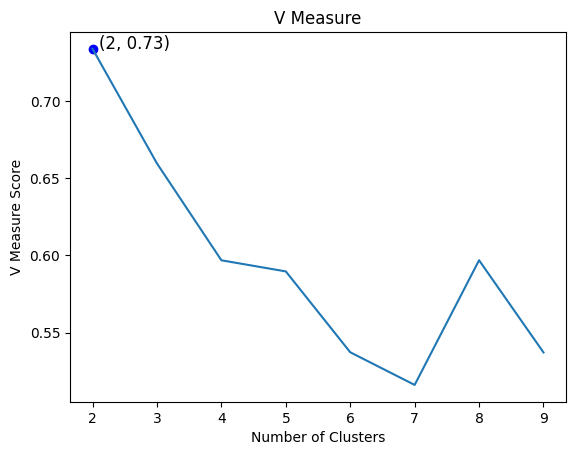

In [113]:
from sklearn.metrics import v_measure_score 
v_scores = []
best_k = 0
best_score = -1

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=2, init='k-means++', tol=1e-4, n_init=200, max_iter=500) 
    
    # Training the clustering model 
    kmeans.fit(X_scaled) 
    # Storing the predicted Clustering labels 
    labels = kmeans.predict(X_scaled) 
    # Evaluating the performance 
    score = v_measure_score(y, labels)
    v_scores.append(score) 
    if score > best_score:
        best_k = i
        best_score = score

print(f"Optimal number of clusters: {best_k} with a score of {best_score}")
plt.title("V Measure")
plt.xlabel("Number of Clusters");
plt.ylabel("V Measure Score");
plt.plot(best_k, v_scores[best_k-2], 'o', color='b');
plt.text(best_k+.1, v_scores[best_k-2], f'({best_k}, {round(v_scores[best_k-2],2)})', fontsize=12, ha='left');

plt.plot([i for i in range(2,10)],v_scores);

##### Visualizing Different values of K

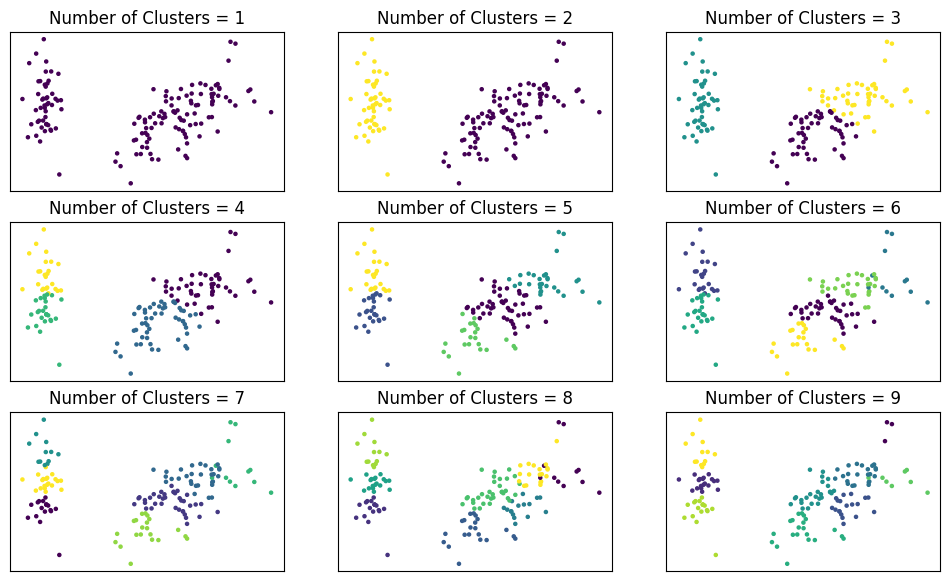

In [114]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



fig, ax = plt.subplots(3,3)
fig.set_figheight(7)
fig.set_figwidth(12)

for i in range(3):
    for j in range(3):
        kmeans = KMeans(n_clusters=(i)*3+(j+1), random_state=2, init='k-means++', tol=1e-4, n_init=200, max_iter=500).fit(X_scaled)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        ax[i][j].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, s = 5)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].set_title(f'Number of Clusters = {(i)*3+(j+1)}')

#### Trying different Distance Measures

In [115]:
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def cosine_similarity(a, b):
    return 1 - (np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

def chebyshev_distance(a, b):
    return np.max(np.abs(a - b))

def kmeans_custom(X, k, dist_func, max_iters=400):
    # Randomly initialize centroids
    np.random.seed(11)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        labels = np.array([np.argmin([dist_func(x, c) for c in centroids]) for x in X])

        # Finding new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Converging?
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    # SSE is done wrt to Euclidean to ensure fair comparison
    sse = np.zeros(4)
    sse[0] = np.sum([manhattan_distance(X[i], centroids[labels[i]])**2 for i in range(len(X))])
    sse[1] = np.sum([euclidean_distance(X[i], centroids[labels[i]])**2 for i in range(len(X))])
    sse[2] = np.sum([cosine_similarity(X[i], centroids[labels[i]])**2 for i in range(len(X))])
    sse[3] = np.sum([chebyshev_distance(X[i], centroids[labels[i]])**2 for i in range(len(X))])

    return labels, centroids, sse

In [116]:
def plot_kmeans(X_pca, ax, centers, labels, y_encoded, title):
    # Plotting
    mark = ['x','o','s']
    colors = ['#9B59B6', '#2ECC71', '#3498DB']

    ax.set_height = 6
    ax.set_width = 5
    for i,r in y.items():
        ax.scatter(X_pca[i,0], X_pca[i,1], color=colors[y_encoded[i]], marker=mark[labels[i]])

    for center in centers:
        ax.scatter(center[0], center[1],  color='r', marker='*', s=100)
        
    ax.set_title(title)
    ax.scatter([], [], marker='o', color='black', label='Predicted Class 1')
    ax.scatter([], [], marker='x', color='black', label='Predicted Class 2')
    ax.scatter([], [], marker='s', color='black', label='Predicted Class 3')
    ax.scatter([], [], marker='o', color='#9B59B6', label='Iris-setosa')
    ax.scatter([], [], marker='o', color='#2ECC71', label='Iris-versicolor')
    ax.scatter([], [], marker='o', color='#3498DB', label='Iris-virginica')
    ax.scatter([], [], marker='*', color='r', label='Cluster Centers')


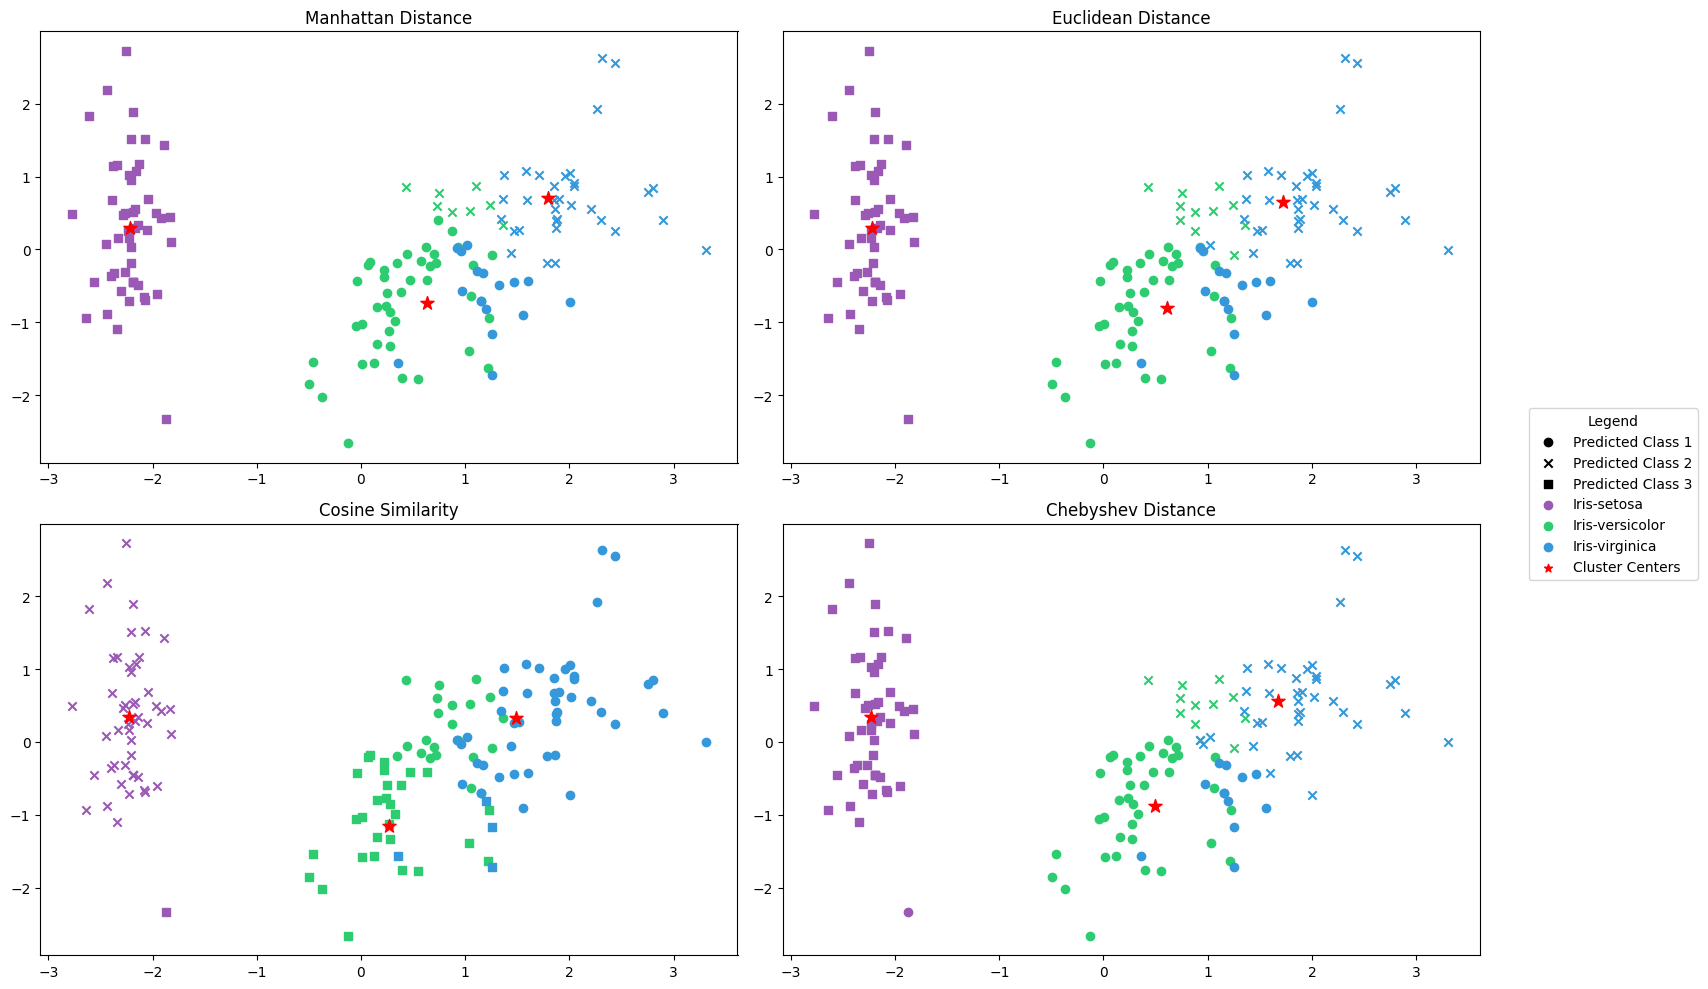

In [117]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(2,2, figsize=(15,10))
handles = [ plt.scatter([], [], marker='o', color='black'),
plt.scatter([], [], marker='x', color='black'),
plt.scatter([], [], marker='s', color='black'),
plt.scatter([], [], marker='o', color='#9B59B6'),
plt.scatter([], [], marker='o', color='#2ECC71'),
plt.scatter([], [], marker='o', color='#3498DB'),
plt.scatter([], [], marker='*', color='r')]

labels = [
'Predicted Class 1',
'Predicted Class 2',
'Predicted Class 3',
'Iris-setosa',
'Iris-versicolor',
'Iris-virginica',
'Cluster Centers',
]

fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.14, 0.5), title='Legend')

metric = np.zeros((4,4))
l1, c1, metric[0] = kmeans_custom(X_pca, 3, manhattan_distance)
l2, c2, metric[1] = kmeans_custom(X_pca, 3, euclidean_distance)
l3, c3, metric[2] = kmeans_custom(X_pca, 3, cosine_similarity)
l4, c4, metric[3] = kmeans_custom(X_pca, 3, chebyshev_distance)

performance_based_on_metric = pd.DataFrame([{"Manhattan":i[0], "Euclidean":i[1], "Cosine Distance":i[2], "Chebyshev":i[3] } for i in metric])

plot_kmeans(X_pca, ax[0][0], c1, l1, y_encoded, "Manhattan Distance")
plot_kmeans(X_pca, ax[0][1], c2, l2, y_encoded, "Euclidean Distance")
plot_kmeans(X_pca, ax[1][0], c3, l3, y_encoded, "Cosine Similarity")
plot_kmeans(X_pca, ax[1][1], c4, l4, y_encoded, "Chebyshev Distance")

fig.tight_layout()

In [118]:
def calculate_purity(clusters, true_labels):
    df = pd.DataFrame({'Cluster': clusters, 'TrueLabel': true_labels})
    cluster_counts = df.groupby(['Cluster', 'TrueLabel']).size().unstack(fill_value=0)
    max_counts = cluster_counts.max(axis=1)
    purity = max_counts.sum() / len(true_labels)  # Total number of samples
    return purity

purity1 = calculate_purity(l1, y_encoded)
purity2 = calculate_purity(l2, y_encoded)
purity3 = calculate_purity(l3, y_encoded)
purity4 = calculate_purity(l4, y_encoded)

print(f"The purity scores of Manhattan Distance is {purity1}")
print(f"The purity scores of Euclidean Distance is {purity2}")
print(f"The purity scores of Cosine Distance is {purity3}")
print(f"The purity scores of Chebyshev Distance is {purity4}")

The purity scores of Manhattan Distance is 0.8333333333333334
The purity scores of Euclidean Distance is 0.82
The purity scores of Cosine Distance is 0.8266666666666667
The purity scores of Chebyshev Distance is 0.8333333333333334


`Conclusion:` All distance measures seem to have a similar extrinsic performance for this dataset.

### Final Clustering Output

c:\Users\AltoTenor\Documents\Python\Jupyter\jupytervenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


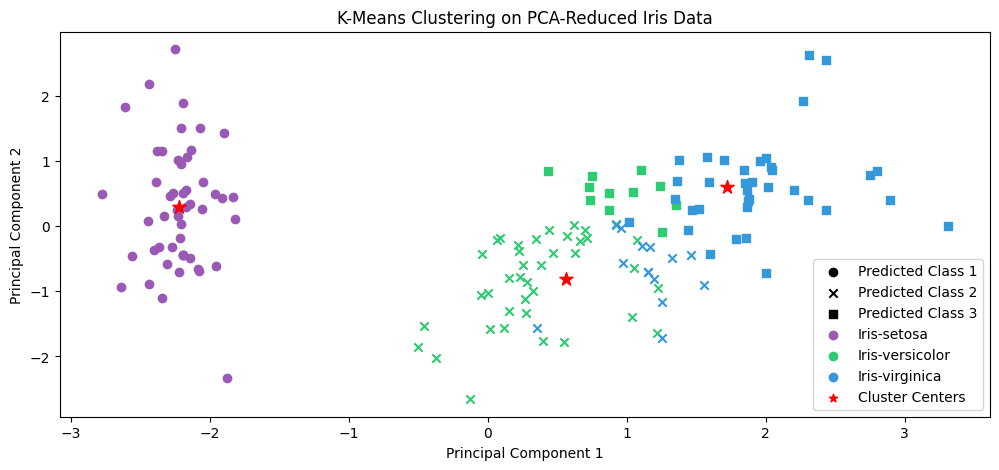

Intrinsic Measures:
Silhouette Score: 0.51
Davies-Bouldin Index: 0.74
Within-Cluster Sum of Squares (WCSS): 140.97

Extrinsic Measures:
Adjusted Rand Index (ARI): 0.62
Normalized Mutual Information (NMI): 0.66
Fowlkes-Mallows Index (FMI): 0.75

Thus, we can say approximately,
Class 1 = Iris-setosa
Class 2 = Iris-versicolor
Class 3 = Iris-virginica


In [119]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=2, init='k-means++', tol=1e-4, n_init=200, max_iter=500).fit(X_scaled)

# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting
mark = ['x','o','s']
colors = ['#9B59B6', '#2ECC71', '#3498DB']

plt.figure(figsize=(12,5))
for i,r in y.items():
    plt.scatter(X_pca[i,0], X_pca[i,1], color=colors[y_encoded[i]], marker=mark[kmeans.labels_[i]])

pca_centers = pca.transform(kmeans.cluster_centers_)

for center in pca_centers:
    plt.scatter(center[0], center[1],  color='r', marker='*', s=100)
    
plt.title('K-Means Clustering on PCA-Reduced Iris Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter([], [], marker='o', color='black', label='Predicted Class 1')
plt.scatter([], [], marker='x', color='black', label='Predicted Class 2')
plt.scatter([], [], marker='s', color='black', label='Predicted Class 3')
plt.scatter([], [], marker='o', color='#9B59B6', label='Iris-setosa')
plt.scatter([], [], marker='o', color='#2ECC71', label='Iris-versicolor')
plt.scatter([], [], marker='o', color='#3498DB', label='Iris-virginica')
plt.scatter([], [], marker='*', color='r', label='Cluster Centers')
plt.legend(loc=4)
plt.show()

# Intrinsic Measures
silhouette = silhouette_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
wcss = kmeans.inertia_  # Within-Cluster Sum of Squares

# Extrinsic Measures
ari = adjusted_rand_score(y, kmeans.labels_)
nmi = normalized_mutual_info_score(y, kmeans.labels_)
fmi = fowlkes_mallows_score(y, kmeans.labels_)

print("Intrinsic Measures:")
print(f"Silhouette Score: {round(silhouette,2)}")
print(f"Davies-Bouldin Index: {round(davies_bouldin,2)}")
print(f"Within-Cluster Sum of Squares (WCSS): {round(wcss,2)}")

print("\nExtrinsic Measures:")
print(f"Adjusted Rand Index (ARI): {round(ari,2)}")
print(f"Normalized Mutual Information (NMI): {round(nmi,2)}")
print(f"Fowlkes-Mallows Index (FMI): {round(fmi,2)}")

print("\nThus, we can say approximately,\nClass 1 = Iris-setosa")
print("Class 2 = Iris-versicolor")
print("Class 3 = Iris-virginica")
